In [434]:
import numpy as np
import pandas as pd
import numpy.random as npr

In [435]:
cd C:/Project CPC152

C:\Project CPC152


In [436]:
iris = pd.read_csv("iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Understanding the data

In [437]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [438]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [439]:
iris.shape

(150, 6)

In [440]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Cleaning Data

In [441]:
iris.apply(lambda x: sum(x.isnull()), axis = 0)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Spliting the Dataset

In [442]:
x = iris.iloc[:, 0:5]
y = iris.iloc[:, 5]

In [443]:
print(x.shape)

(150, 5)


In [444]:
print(y.shape)

(150,)


In [445]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4)
X_train1,X_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=4)

In [446]:
print(X_train.shape)
print(X_test.shape)

(105, 5)
(45, 5)


In [447]:
print(y_train.shape)
print(y_test.shape)

(105,)
(45,)


## Feature Scaling


In [448]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)


## Predictions

In [449]:
from sklearn.neighbors import KNeighborsClassifier

In [450]:
from sklearn import metrics
k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

In [451]:
scores

{1: 0.9555555555555556,
 2: 0.9555555555555556,
 3: 0.9333333333333333,
 4: 0.9333333333333333,
 5: 0.9333333333333333,
 6: 0.9333333333333333,
 7: 0.9333333333333333,
 8: 0.9333333333333333,
 9: 0.9333333333333333,
 10: 0.9333333333333333,
 11: 0.9333333333333333,
 12: 0.9333333333333333,
 13: 0.9333333333333333,
 14: 0.9333333333333333,
 15: 0.9333333333333333,
 16: 0.9333333333333333,
 17: 0.9333333333333333,
 18: 0.9555555555555556,
 19: 0.9555555555555556,
 20: 0.9555555555555556,
 21: 0.9555555555555556,
 22: 0.9555555555555556,
 23: 0.9555555555555556,
 24: 0.9555555555555556,
 25: 0.9555555555555556}

In [452]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Testing Accuracy')

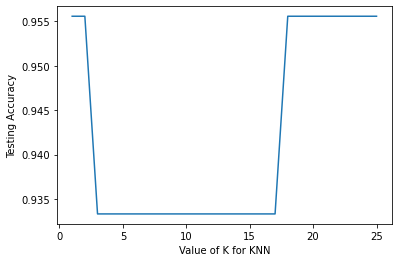

In [453]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [454]:
model = KNeighborsClassifier(n_neighbors=1) 

### For 70% train_set and 30% test_set

### Using SepalLengthCm and SepalWidthCm to predict the species of iris

In [455]:
model.fit(train_set[['SepalLengthCm','SepalWidthCm']], train_set['Species'])

KNeighborsClassifier(n_neighbors=1)

In [456]:
predictions = model.predict(test_set[['SepalLengthCm','SepalWidthCm']])
predictions

array([2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 0,
       2], dtype=int64)

In [457]:
test_set = test_set.assign(Predictions = predictions)
test_set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predictions
128,129,6.4,2.8,5.6,2.1,2,2
18,19,5.7,3.8,1.7,0.3,0,0
130,131,7.4,2.8,6.1,1.9,2,2
105,106,7.6,3.0,6.6,2.1,2,2
107,108,7.3,2.9,6.3,1.8,2,2
78,79,6.0,2.9,4.5,1.5,1,2
83,84,6.0,2.7,5.1,1.6,1,1
14,15,5.8,4.0,1.2,0.2,0,0
5,6,5.4,3.9,1.7,0.4,0,0
133,134,6.3,2.8,5.1,1.5,2,2


In [458]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(test_set['Species'], predictions))
print('Recall: ', recall_score(test_set['Species'], predictions, average="weighted"))
print('Precision: ', precision_score(test_set['Species'], predictions, average="weighted"))
confusion = confusion_matrix(test_set['Species'], predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.8222222222222222
Recall:  0.8222222222222222
Precision:  0.8356125356125356
Confusion matrix: 
[[20  1  0]
 [ 0  7  3]
 [ 0  4 10]]


### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [459]:
model.fit(train_set[['PetalLengthCm','PetalWidthCm']], train_set['Species'])

KNeighborsClassifier(n_neighbors=1)

predictions = model.predict(test_set[['PetalLengthCm','PetalWidthCm']])
predictions

In [460]:
test_set = test_set.assign(Predictions = predictions)
test_set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predictions
128,129,6.4,2.8,5.6,2.1,2,2
18,19,5.7,3.8,1.7,0.3,0,0
130,131,7.4,2.8,6.1,1.9,2,2
105,106,7.6,3.0,6.6,2.1,2,2
107,108,7.3,2.9,6.3,1.8,2,2
78,79,6.0,2.9,4.5,1.5,1,2
83,84,6.0,2.7,5.1,1.6,1,1
14,15,5.8,4.0,1.2,0.2,0,0
5,6,5.4,3.9,1.7,0.4,0,0
133,134,6.3,2.8,5.1,1.5,2,2


In [461]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(test_set['Species'], predictions))
print('Recall: ', recall_score(test_set['Species'], predictions, average="weighted"))
print('Precision: ', precision_score(test_set['Species'], predictions, average="weighted"))
confusion = confusion_matrix(test_set['Species'], predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.8222222222222222
Recall:  0.8222222222222222
Precision:  0.8356125356125356
Confusion matrix: 
[[20  1  0]
 [ 0  7  3]
 [ 0  4 10]]


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [462]:
model.fit(train_set[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], train_set['Species'])

KNeighborsClassifier(n_neighbors=1)

In [463]:
predictions = model.predict(test_set[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2], dtype=int64)

In [464]:
test_set = test_set.assign(Predictions = predictions)
test_set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predictions
128,129,6.4,2.8,5.6,2.1,2,2
18,19,5.7,3.8,1.7,0.3,0,0
130,131,7.4,2.8,6.1,1.9,2,2
105,106,7.6,3.0,6.6,2.1,2,2
107,108,7.3,2.9,6.3,1.8,2,2
78,79,6.0,2.9,4.5,1.5,1,1
83,84,6.0,2.7,5.1,1.6,1,2
14,15,5.8,4.0,1.2,0.2,0,0
5,6,5.4,3.9,1.7,0.4,0,0
133,134,6.3,2.8,5.1,1.5,2,1


In [465]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(test_set['Species'], predictions))
print('Recall: ', recall_score(test_set['Species'], predictions, average="weighted"))
print('Precision: ', precision_score(test_set['Species'], predictions, average="weighted"))
confusion = confusion_matrix(test_set['Species'], predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.9555555555555556
Recall:  0.9555555555555556
Precision:  0.9555555555555556
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  1 13]]


### For 80% train_set and 20% test_set

### Using SepalLengthCm and SepallWidthCm to predict the species of iris

In [466]:
model.fit(train_set1[['SepalLengthCm','SepalWidthCm']], train_set1['Species'])

KNeighborsClassifier(n_neighbors=1)

In [467]:
predictions = model.predict(test_set1[['SepalLengthCm','SepalWidthCm']])
predictions

array([2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [468]:
test_set1 = test_set1.assign(Predictions = predictions)
test_set1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predictions
128,129,6.4,2.8,5.6,2.1,2,2
18,19,5.7,3.8,1.7,0.3,0,0
130,131,7.4,2.8,6.1,1.9,2,2
105,106,7.6,3.0,6.6,2.1,2,2
107,108,7.3,2.9,6.3,1.8,2,2
78,79,6.0,2.9,4.5,1.5,1,2
83,84,6.0,2.7,5.1,1.6,1,1
14,15,5.8,4.0,1.2,0.2,0,0
5,6,5.4,3.9,1.7,0.4,0,0
133,134,6.3,2.8,5.1,1.5,2,2


In [469]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(test_set1['Species'], predictions))
print('Recall: ', recall_score(test_set1['Species'], predictions, average="weighted"))
print('Precision: ', precision_score(test_set1['Species'], predictions, average="weighted"))
confusion = confusion_matrix(test_set1['Species'], predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.8333333333333334
Recall:  0.8333333333333334
Precision:  0.85
Confusion matrix: 
[[15  1  0]
 [ 0  3  2]
 [ 0  2  7]]


### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [470]:
model.fit(train_set1[['PetalLengthCm','PetalWidthCm']], train_set1['Species'])

KNeighborsClassifier(n_neighbors=1)

In [471]:
predictions = model.predict(test_set1[['PetalLengthCm','PetalWidthCm']])
predictions

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2], dtype=int64)

In [472]:
test_set1 = test_set1.assign(Predictions = predictions)
test_set1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predictions
128,129,6.4,2.8,5.6,2.1,2,2
18,19,5.7,3.8,1.7,0.3,0,0
130,131,7.4,2.8,6.1,1.9,2,2
105,106,7.6,3.0,6.6,2.1,2,2
107,108,7.3,2.9,6.3,1.8,2,2
78,79,6.0,2.9,4.5,1.5,1,1
83,84,6.0,2.7,5.1,1.6,1,1
14,15,5.8,4.0,1.2,0.2,0,0
5,6,5.4,3.9,1.7,0.4,0,0
133,134,6.3,2.8,5.1,1.5,2,2


In [473]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(test_set1['Species'], predictions))
print('Recall: ', recall_score(test_set1['Species'], predictions, average="weighted"))
print('Precision: ', precision_score(test_set1['Species'], predictions, average="weighted"))
confusion = confusion_matrix(test_set1['Species'], predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy:  1.0
Recall:  1.0
Precision:  1.0
Confusion matrix: 
[[16  0  0]
 [ 0  5  0]
 [ 0  0  9]]


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [474]:
model.fit(train_set1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], train_set1['Species'])

KNeighborsClassifier(n_neighbors=1)

In [475]:
predictions = model.predict(test_set1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2], dtype=int64)

In [476]:
test_set1 = test_set1.assign(Predictions = predictions)
test_set1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predictions
128,129,6.4,2.8,5.6,2.1,2,2
18,19,5.7,3.8,1.7,0.3,0,0
130,131,7.4,2.8,6.1,1.9,2,2
105,106,7.6,3.0,6.6,2.1,2,2
107,108,7.3,2.9,6.3,1.8,2,2
78,79,6.0,2.9,4.5,1.5,1,1
83,84,6.0,2.7,5.1,1.6,1,2
14,15,5.8,4.0,1.2,0.2,0,0
5,6,5.4,3.9,1.7,0.4,0,0
133,134,6.3,2.8,5.1,1.5,2,1


In [477]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(test_set1['Species'], predictions))
print('Recall: ', recall_score(test_set1['Species'], predictions, average="weighted"))
print('Precision: ', precision_score(test_set1['Species'], predictions, average="weighted"))
confusion = confusion_matrix(test_set1['Species'], predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.9333333333333333
Recall:  0.9333333333333333
Precision:  0.9333333333333333
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]
